**Android Gaming Trends**

https://www.kaggle.com/datasets/sonawanelalitsunil/android-gaming-trends

About Dataset
📘 Overview

The Android Game Dataset provides a comprehensive overview of mobile games available on the Google Play Store, capturing a wide range of information about game characteristics, performance metrics, user engagement, and popularity trends. This dataset is designed for data analysis, visualization, and machine learning tasks related to mobile gaming and app market insights.

It helps researchers, developers, and data scientists analyze patterns in game ratings, genres, reviews, installs, monetization methods, and player engagement across thousands of Android titles.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('android-games.csv')
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [ ]:
df.isna().sum()

,0
rank,0
title,0
total ratings,0
installs,0
average rating,0
growth (30 days),0
growth (60 days),0
price,0
category,0
5 star ratings,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


<Axes: xlabel='count', ylabel='category'>

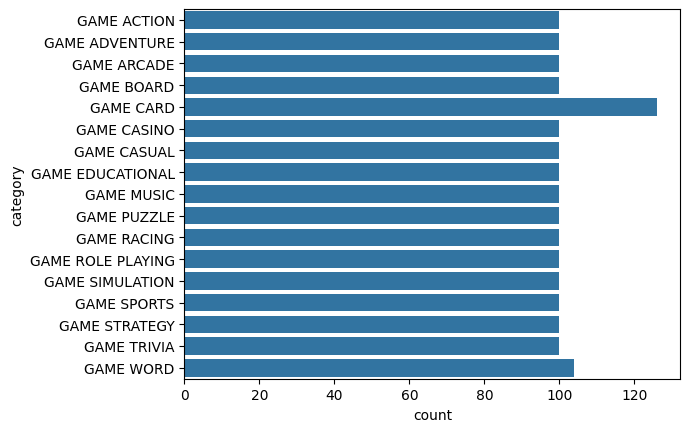

In [ ]:
sns.countplot(df['category'])

<Axes: xlabel='count', ylabel='installs'>

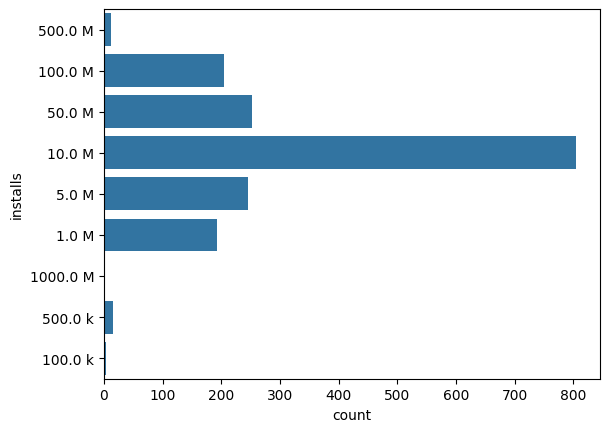

In [ ]:
sns.countplot(df['installs'])

- data normalize

In [2]:
df['paid'] = df['paid'].map({False:0,True:1})

def converter_valor(x):
    x = str(x).upper().strip()  # padroniza (ex: 'k' -> 'K')
    if x.endswith('M'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('K'):
        return float(x[:-1]) * 1_000
    else:
        return float(x)

df['installs'] = df['installs'].apply(converter_valor)

<Axes: >

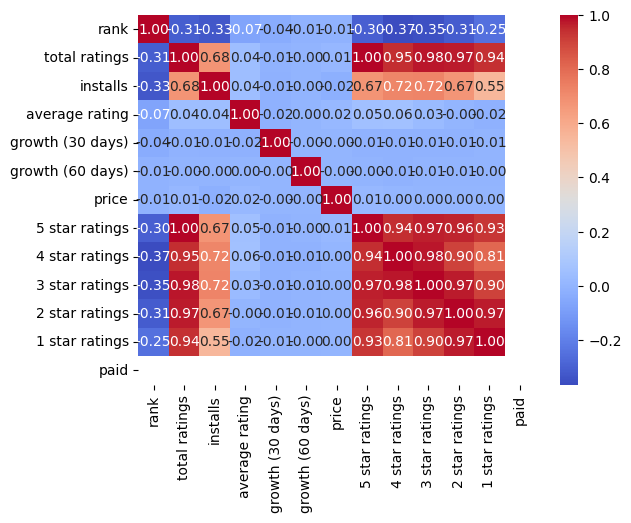

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt=".2f")

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

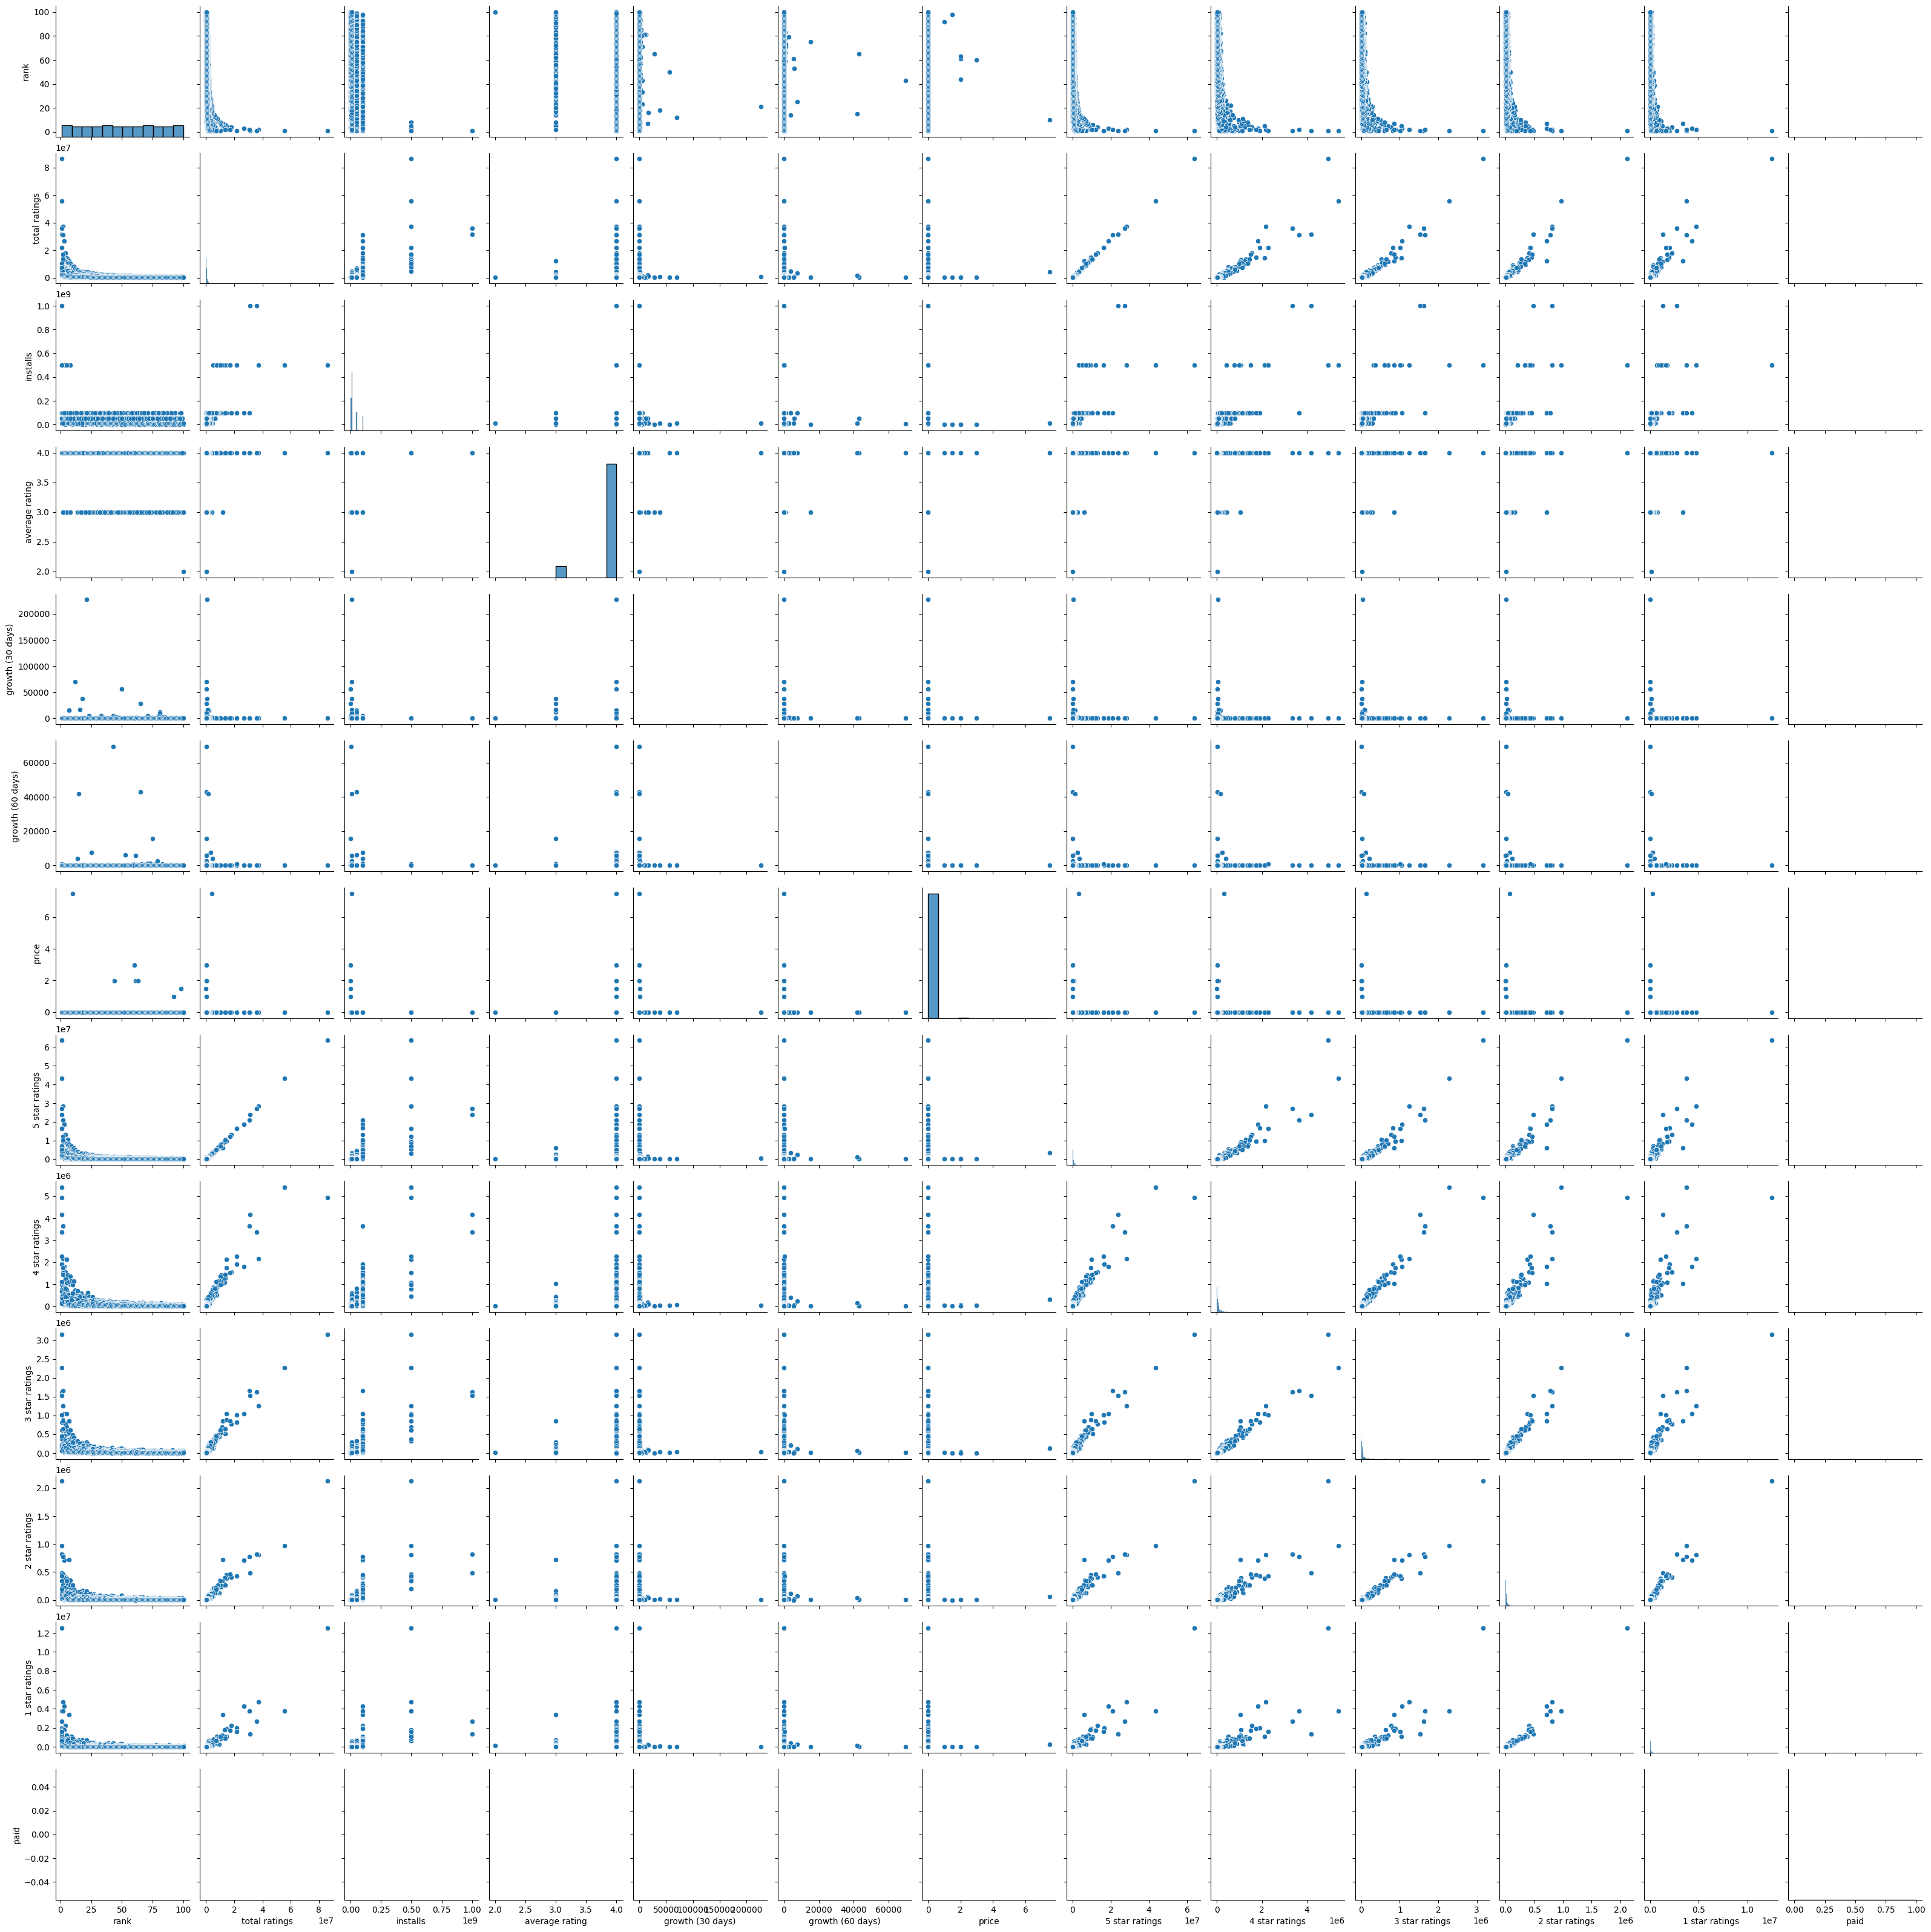

In [ ]:
sns.pairplot(df)
plt.show()

- total ratings and average rating are the features with better influence for a best classification in rank.



In [ ]:
df[['rank','total ratings','average rating']].head()

,rank,total ratings,average rating
0,1,86273129,4
1,2,37276732,4
2,3,26663595,4
3,4,17971552,4
4,5,14464235,4


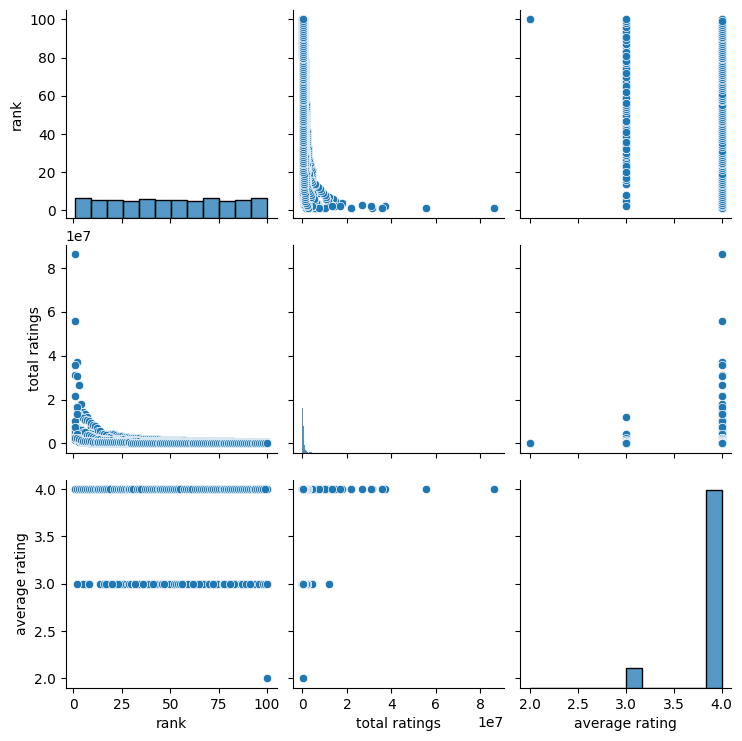

In [ ]:
sns.pairplot(df[['rank','total ratings','average rating']])

- features enginering and new insights datas

In [ ]:
df['prop_install_total_rating'] = df['total ratings'] / df['installs']
df['prop_install_5_stars'] = df['5 star ratings'] / df['installs']
df['prop_install_4_stars'] = df['4 star ratings'] / df['installs']
df['prop_install_3_stars'] = df['3 star ratings'] / df['installs']
df['prop_install_2_stars'] = df['2 star ratings'] / df['installs']
df['prop_install_1_stars'] = df['1 star ratings'] / df['installs']

In [ ]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,...,3 star ratings,2 star ratings,1 star ratings,paid,prop_install_total_rating,prop_install_5_stars,prop_install_4_stars,prop_install_3_stars,prop_install_2_stars,prop_install_1_stars
0,1,Garena Free Fire- World Series,86273129,500000000.0,4,2.1,6.9,0.0,GAME ACTION,63546766,...,3158756,2122183,12495915,0,0.172546,0.127094,0.009899,0.006318,0.004244,0.024992
1,2,PUBG MOBILE - Traverse,37276732,500000000.0,4,1.8,3.6,0.0,GAME ACTION,28339753,...,1253185,809821,4709492,0,0.074553,0.056680,0.004329,0.002506,0.001620,0.009419
2,3,Mobile Legends: Bang Bang,26663595,100000000.0,4,1.5,3.2,0.0,GAME ACTION,18777988,...,1050600,713912,4308998,0,0.266636,0.187780,0.018121,0.010506,0.007139,0.043090
3,4,Brawl Stars,17971552,100000000.0,4,1.4,4.4,0.0,GAME ACTION,13018610,...,774012,406184,2219794,0,0.179716,0.130186,0.015529,0.007740,0.004062,0.022198
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500000000.0,4,0.8,1.5,0.0,GAME ACTION,9827328,...,1047741,380670,1084340,0,0.028928,0.019655,0.004248,0.002095,0.000761,0.002169


- few users rating the games

- although few users rating the games, they give good reviews

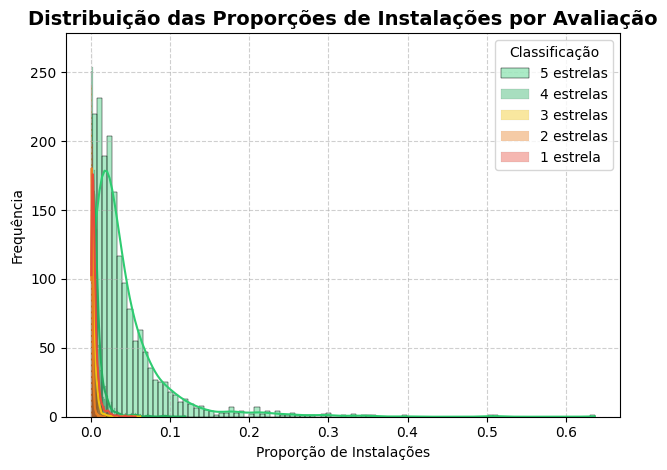

In [ ]:
colors = ['#2ecc71', '#27ae60', '#f1c40f', '#e67e22', '#e74c3c']
labels = ['5 estrelas', '4 estrelas', '3 estrelas', '2 estrelas', '1 estrela']

sns.histplot(df['prop_install_5_stars'],color=colors[0], kde=True, alpha=0.4, label=labels[0])
sns.histplot(df['prop_install_4_stars'],color=colors[1], kde=True, alpha=0.4, label=labels[1])
sns.histplot(df['prop_install_3_stars'],color=colors[2], kde=True, alpha=0.4, label=labels[2])
sns.histplot(df['prop_install_2_stars'],color=colors[3], kde=True, alpha=0.4, label=labels[3])
sns.histplot(df['prop_install_1_stars'],color=colors[4], kde=True, alpha=0.4, label=labels[4])
plt.title("Distribuição das Proporções de Instalações por Avaliação", fontsize=14, weight='bold')
plt.xlabel("Proporção de Instalações")
plt.ylabel("Frequência")
plt.legend(title="Classificação")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- falling games

In [ ]:
df_falling = df[df['growth (60 days)'] < df['growth (30 days)']].sort_values(by='growth (30 days)',ascending=False).head(30)
df_falling

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,...,3 star ratings,2 star ratings,1 star ratings,paid,prop_install_total_rating,prop_install_5_stars,prop_install_4_stars,prop_install_3_stars,prop_install_2_stars,prop_install_1_stars
546,21,Dummy ดัมมี่ ไพ่แคง เกมไพ่ฟรี,477132,10000000.0,4,227105.7,2.2,0.0,GAME CASINO,367411,...,28359,9074,23822,0,0.047713,0.036741,0.004846,0.002836,0.000907,0.002382
1537,12,Gartic,357020,10000000.0,4,69928.5,1.6,0.0,GAME TRIVIA,230895,...,25746,10562,36953,0,0.035702,0.023089,0.005286,0.002575,0.001056,0.003695
463,50,Belote.com - Free Belote Game,170181,1000000.0,4,55880.6,5.3,0.0,GAME CARD,116976,...,10188,3336,6503,0,0.170181,0.116976,0.033175,0.010188,0.003336,0.006503
426,18,Durak Online,467621,10000000.0,3,37994.4,2.6,0.0,GAME CARD,275963,...,26591,15940,103016,0,0.046762,0.027596,0.004611,0.002659,0.001594,0.010302
1590,65,New QuizDuel!,72097,1000000.0,3,28062.9,9.8,0.0,GAME TRIVIA,28045,...,3730,3681,23930,0,0.072097,0.028045,0.012708,0.003730,0.003681,0.023930
1141,16,세븐나이츠,937102,10000000.0,3,17025.0,0.1,0.0,GAME ROLE PLAYING,528121,...,76690,38540,205610,0,0.093710,0.052812,0.008814,0.007669,0.003854,0.020561
106,7,Mini World: Block Art,2016845,50000000.0,4,15364.2,5.2,0.0,GAME ADVENTURE,1423448,...,90975,57560,283626,0,0.040337,0.028469,0.003225,0.001819,0.001151,0.005673
1106,81,Truck Driver Cargo,308362,50000000.0,3,12602.3,0.7,0.0,GAME RACING,193275,...,19047,12841,59571,0,0.006167,0.003866,0.000472,0.000381,0.000257,0.001191
1406,81,Mobile Soccer League,327608,10000000.0,4,9750.2,1.3,0.0,GAME SPORTS,210984,...,24348,11236,34766,0,0.032761,0.021098,0.004627,0.002435,0.001124,0.003477
568,43,"GAMEE Prizes - Play Free Games, WIN REAL CASH!",266126,10000000.0,4,5550.2,14.5,0.0,GAME CASINO,176379,...,22679,9287,21836,0,0.026613,0.017638,0.003594,0.002268,0.000929,0.002184


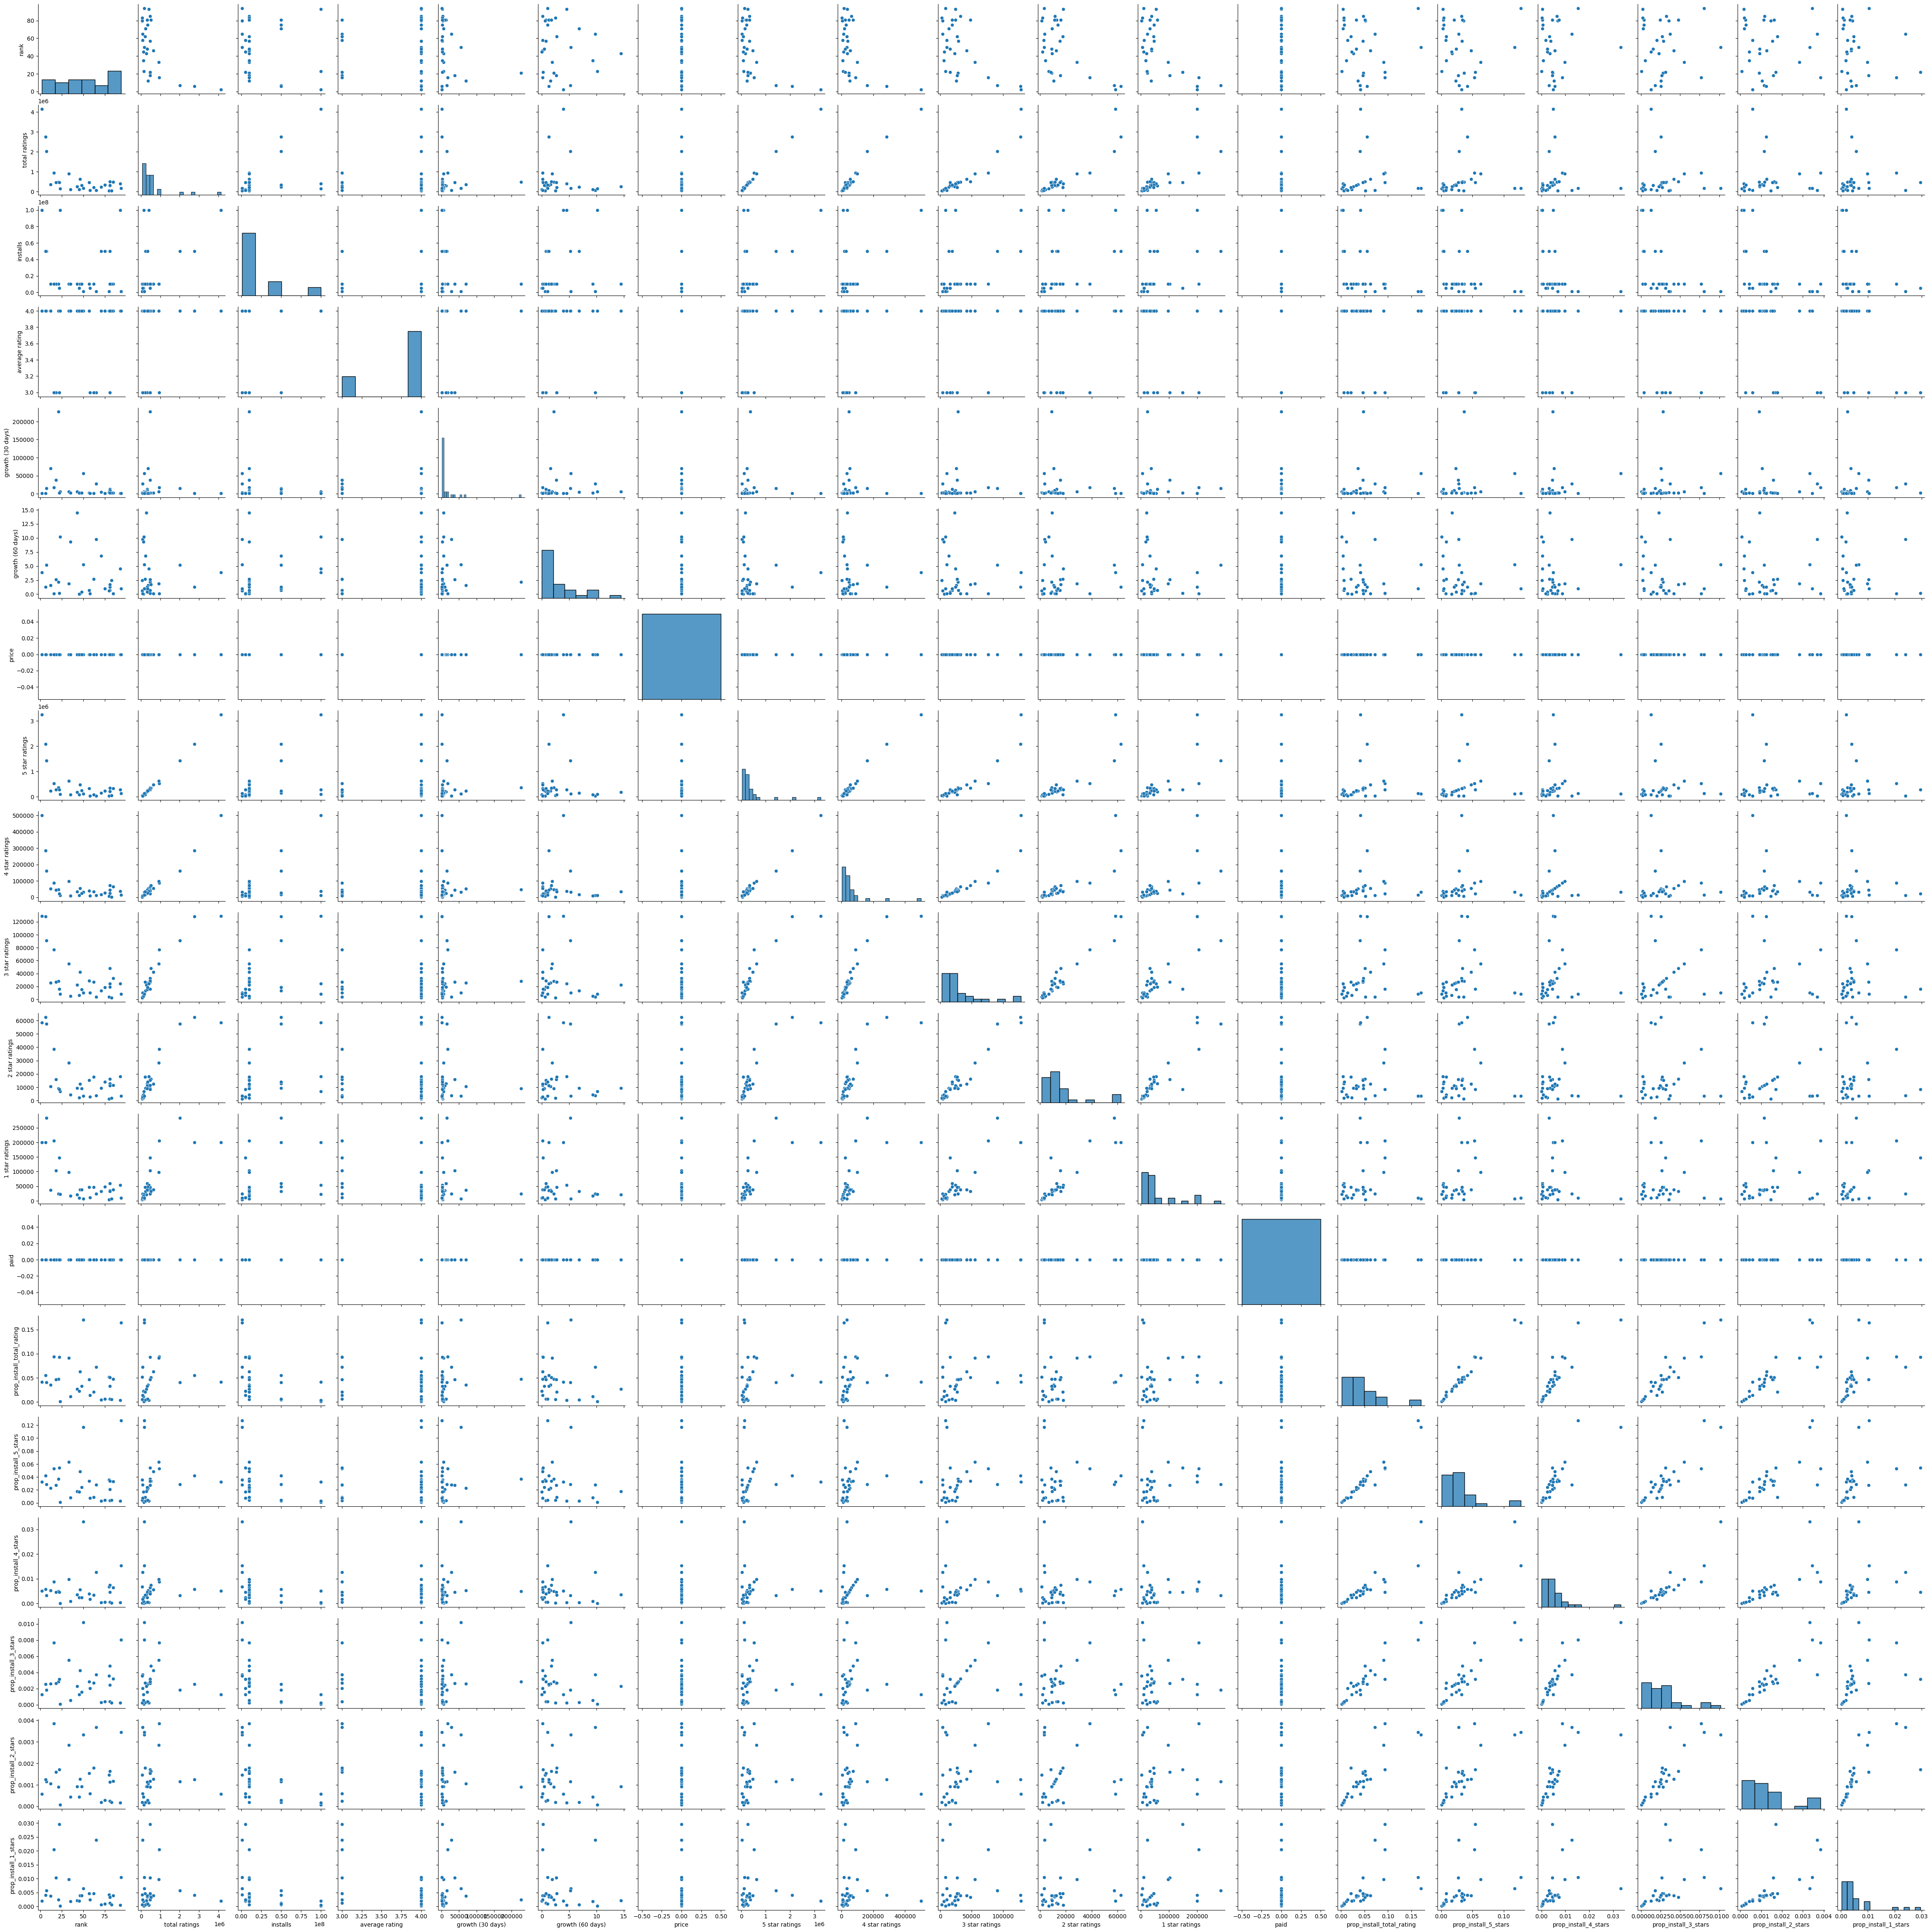

In [ ]:
sns.pairplot(df_falling)

- growing games

In [ ]:
df_growing = df[df['growth (60 days)'] > df['growth (30 days)']].sort_values(by='growth (60 days)',ascending=False).head(30)
df_growing

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,...,3 star ratings,2 star ratings,1 star ratings,paid,prop_install_total_rating,prop_install_5_stars,prop_install_4_stars,prop_install_3_stars,prop_install_2_stars,prop_install_1_stars
454,43,Domino QiuQiu 2020 - Domino 99 · Gaple online,194946,5000000.0,4,3.4,69441.4,0.0,GAME CARD,158260,...,8488,4393,13540,0,0.038989,0.031652,0.002052,0.001698,0.000879,0.002708
364,65,Carrom King™ - Best Online Carrom Board Pool Game,160744,50000000.0,4,3.9,42875.2,0.0,GAME BOARD,106470,...,9565,5473,21862,0,0.003215,0.002129,0.000347,0.000191,0.000109,0.000437
1440,15,Castle Clash: Схватка Гильдий,1727242,10000000.0,4,0.2,41869.7,0.0,GAME STRATEGY,1317062,...,69614,36254,157515,0,0.172724,0.131706,0.014679,0.006961,0.003625,0.015752
374,75,인생역전윷놀이,126466,1000000.0,3,0.1,15483.9,0.0,GAME BOARD,68210,...,16060,4827,16130,0,0.126466,0.068210,0.021237,0.016060,0.004827,0.016130
24,25,Special Forces Group 2,3195503,100000000.0,4,1.4,7584.9,0.0,GAME ACTION,2486283,...,118927,70889,287147,0,0.031955,0.024863,0.002323,0.001189,0.000709,0.002871
1078,53,Racing Fever: Moto,549630,50000000.0,4,1.2,6004.4,0.0,GAME RACING,393808,...,30694,18239,57054,0,0.010993,0.007876,0.000997,0.000614,0.000365,0.001141
1688,61,Aplasta Palabras：Juego de Palabras Gratis sin ...,214313,10000000.0,4,17.1,5556.2,0.0,GAME WORD,189623,...,4835,935,2530,0,0.021431,0.018962,0.001639,0.000483,0.000093,0.000253
13,14,Talking Tom Gold Run,4710639,100000000.0,4,1.3,4012.8,0.0,GAME ACTION,3581634,...,200800,116460,413948,0,0.047106,0.035816,0.003978,0.002008,0.001165,0.004139
1104,79,Moto Racer 3D,310589,10000000.0,4,1358.2,2716.5,0.0,GAME RACING,194685,...,34664,14257,32847,0,0.031059,0.019468,0.003413,0.003466,0.001426,0.003285
703,78,Idle Sightseeing Train - Game of Train Transport,526404,1000000.0,4,625.9,1251.8,0.0,GAME CASUAL,332168,...,48369,16909,50748,0,0.526404,0.332168,0.078207,0.048369,0.016909,0.050748


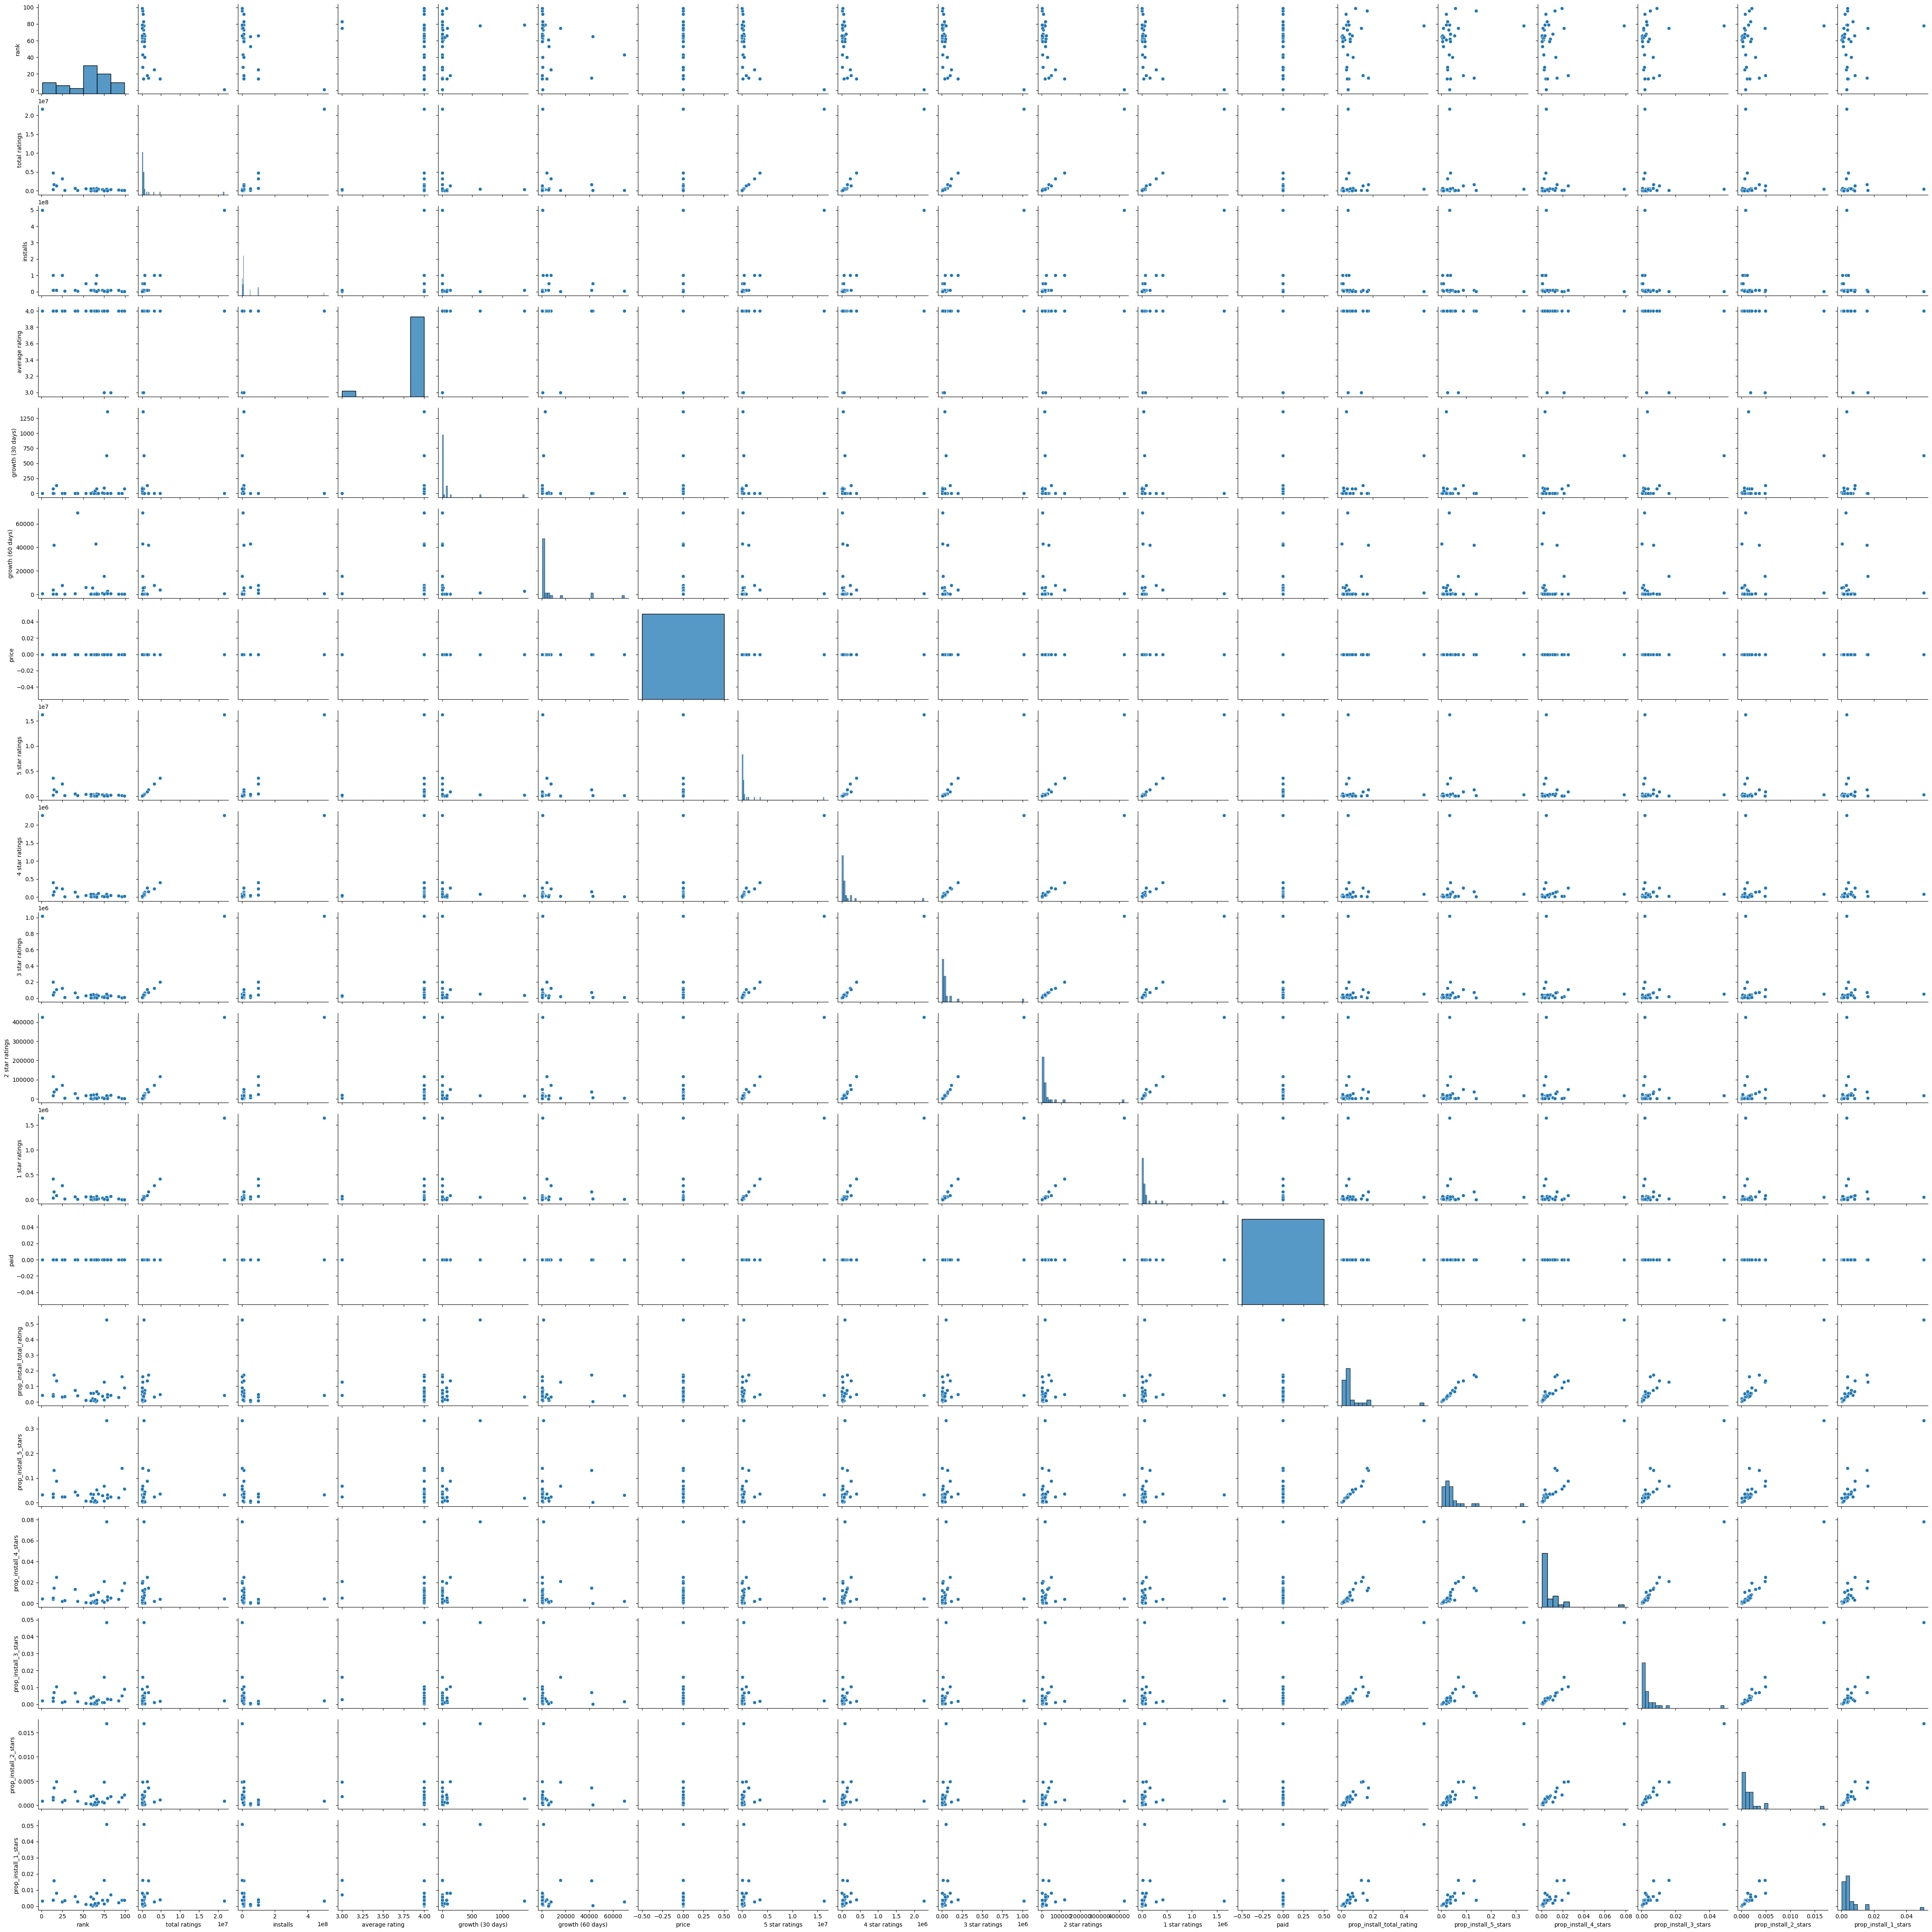

In [ ]:
sns.pairplot(df_growing)